In [1]:
!pip install mlxtend

In [17]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns

In [18]:
df=pd.read_csv("C:\\Users\\Vatsal\\Desktop\\archive\\OnlineRetail.csv",encoding='latin1')

In [19]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [21]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


In [22]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
df.fillna(df['Description'].median,inplace=True)

In [24]:
df.fillna(df['CustomerID'].median,inplace=True)

In [25]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<AxesSubplot:>

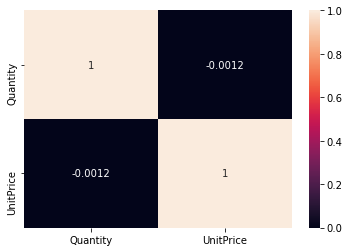

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
basket = (df[df['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  

In [28]:
basket

Description,50'S CHRISTMAS GIFT BAG LARGE,NINE DRAWER OFFICE TIDY,RED SPOT GIFT BAG LARGE,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,...,WRAP FLOWER SHOP,WRAP GINGHAM ROSE,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C558061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C562144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C571325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
def enc(x):
    if x >= 1:
     return 1
    else:
     return 0

In [30]:
basket_set = basket.applymap(enc)
basket_set

Description,50'S CHRISTMAS GIFT BAG LARGE,NINE DRAWER OFFICE TIDY,RED SPOT GIFT BAG LARGE,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,...,WRAP FLOWER SHOP,WRAP GINGHAM ROSE,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C558061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C562144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C571325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
freq_items = apriori(basket_set, min_support = 0.07, use_colnames = True)
freq_items

,support,itemsets
0,0.098592,(4 TRADITIONAL SPINNING TOPS)
1,0.070423,(60 TEATIME FAIRY CAKE CASES)
2,0.169014,(BAKING SET 9 PIECE RETROSPOT )
3,0.070423,(BLUE HARMONICA IN BOX )
4,0.070423,(BOX OF VINTAGE JIGSAW BLOCKS )
...,...,...
247,0.070423,"(LUNCH BAG CARS BLUE, JUMBO SHOPPER VINTAGE RE..."
248,0.070423,"(JUMBO SHOPPER VINTAGE RED PAISLEY, LUNCH BAG ..."
249,0.070423,"(LUNCH BAG PINK POLKADOT, JUMBO SHOPPER VINTAG..."
250,0.070423,"(JUMBO BAG RED RETROSPOT, LUNCH BAG PINK POLKA..."


In [34]:
rules = association_rules(freq_items, metric ="lift", min_threshold = 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CHARLOTTE BAG SUKI DESIGN),(4 TRADITIONAL SPINNING TOPS),0.140845,0.098592,0.070423,0.500000,5.071429,0.056536,1.802817
1,(4 TRADITIONAL SPINNING TOPS),(CHARLOTTE BAG SUKI DESIGN),0.098592,0.140845,0.070423,0.714286,5.071429,0.056536,3.007042
2,(RETROSPOT TEA SET CERAMIC 11 PC ),(4 TRADITIONAL SPINNING TOPS),0.197183,0.098592,0.070423,0.357143,3.622449,0.050982,1.402191
3,(4 TRADITIONAL SPINNING TOPS),(RETROSPOT TEA SET CERAMIC 11 PC ),0.098592,0.197183,0.070423,0.714286,3.622449,0.050982,2.809859
4,(POSTAGE),(BAKING SET 9 PIECE RETROSPOT ),0.422535,0.169014,0.112676,0.266667,1.577778,0.041262,1.133163


In [37]:
rules[(rules["lift"]>=7)& 
      (rules["confidence"]>=0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.070423,0.140845,0.070423,1.000000,7.100000,0.060504,inf
26,(JUMBO BAG SCANDINAVIAN BLUE PAISLEY),(JUMBO BAG PINK VINTAGE PAISLEY),0.126761,0.126761,0.112676,0.888889,7.012346,0.096608,7.859155
27,(JUMBO BAG PINK VINTAGE PAISLEY),(JUMBO BAG SCANDINAVIAN BLUE PAISLEY),0.126761,0.126761,0.112676,0.888889,7.012346,0.096608,7.859155
101,(LUNCH BAG SPACEBOY DESIGN ),(LUNCH BAG PINK POLKADOT),0.070423,0.112676,0.070423,1.000000,8.875000,0.062488,inf
120,(PINK VINTAGE PAISLEY PICNIC BAG),(SCANDINAVIAN PAISLEY PICNIC BAG),0.112676,0.098592,0.098592,0.875000,8.875000,0.087483,7.211268
...,...,...,...,...,...,...,...,...,...
1521,"(LUNCH BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...","(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO BAG RED...",0.084507,0.070423,0.070423,0.833333,11.833333,0.064471,5.577465
1522,"(LUNCH BAG PINK POLKADOT, JUMBO BAG PINK VINTA...","(JUMBO BAG RED RETROSPOT, JUMBO BAG SCANDINAVI...",0.084507,0.070423,0.070423,0.833333,11.833333,0.064471,5.577465
1523,"(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...","(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO BAG RED...",0.084507,0.084507,0.070423,0.833333,9.861111,0.063281,5.492958
1525,"(JUMBO BAG PINK VINTAGE PAISLEY, LUNCH BAG CAR...","(LUNCH BAG PINK POLKADOT, JUMBO BAG RED RETROS...",0.098592,0.070423,0.070423,0.714286,10.142857,0.063479,3.253521
